# ETAPE 1 : ANALYSE EXPLORATOIRE ET PREPARATION DES DONNEES

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I- Exploration des datasets

In [224]:
crop_yield = pd.read_csv('../data/crop_yield.csv')
pesticides = pd.read_csv('../data/pesticides.csv')
rainfall = pd.read_csv('../data/rainfall.csv')
temp = pd.read_csv('../data/temp.csv')
yield_ = pd.read_csv('../data/yield.csv')
yield_df = pd.read_csv('../data/yield_df.csv')

### 1- Le fichier "crop_yield"

In [225]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [226]:
crop_yield.shape

(1000000, 10)

In [227]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [228]:
crop_yield.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [229]:
crop_yield.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

### 2- Le fichier "pesticides"

In [230]:
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [231]:
pesticides['Domain'].unique()

array(['Pesticides Use'], dtype=object)

In [232]:
pesticides['Element'].unique()

array(['Use'], dtype=object)

In [233]:
pesticides['Item'].unique()

array(['Pesticides (total)'], dtype=object)

In [234]:
pesticides['Unit'].unique()

array(['tonnes of active ingredients'], dtype=object)

In [235]:
print(pesticides.shape)
print('le nombre de valeurs manquantes dans pesticides :\n', pesticides.isna().sum())

(4349, 7)
le nombre de valeurs manquantes dans pesticides :
 Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64


In [236]:
pesticides.rename(columns={'Value':'Pesticide_use_total_tonnes'}, inplace=True)

In [237]:
pesticides

,Domain,Area,Element,Item,Year,Unit,Pesticide_use_total_tonnes
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [238]:
pesticides.drop(columns=['Domain','Element','Item', 'Unit'], inplace=True)

In [239]:
pesticides

,Area,Year,Pesticide_use_total_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


### 3- Le fichier "rainfall"

In [240]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [241]:
rainfall.shape

(6727, 3)

In [242]:
rainfall.columns    

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [243]:
print(rainfall.shape)
print('le nombre de valeurs manquantes dans rainfall :\n',rainfall.isna().sum())

(6727, 3)
le nombre de valeurs manquantes dans rainfall :
  Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64


In [244]:
rainfall.loc[rainfall.isna().any(axis=1)]

,Area,Year,average_rain_fall_mm_per_year
93,American Samoa,1985,NaN
94,American Samoa,1986,NaN
95,American Samoa,1987,NaN
96,American Samoa,1989,NaN
97,American Samoa,1990,NaN
...,...,...,...
6598,Virgin Islands (U.S.),2013,NaN
6599,Virgin Islands (U.S.),2014,NaN
6600,Virgin Islands (U.S.),2015,NaN
6601,Virgin Islands (U.S.),2016,NaN


In [245]:
rainfall.rename(columns={' Area':'Area'}, inplace=True)

### 4- Le fichier "temp"

In [246]:
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [247]:
temp.shape

(71311, 3)

### 5- Le fichier "yield_"

In [248]:
yield_.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [249]:
yield_

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [250]:
yield_.shape

(56717, 12)

In [251]:
yield_.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [252]:
print(yield_['Domain Code'].unique())
print(yield_['Domain'].unique())
print(yield_['Element Code'].unique())
print(yield_['Element'].unique())
print(yield_['Unit'].unique())

['QC']
['Crops']
[5419]
['Yield']
['hg/ha']


In [253]:
yield_.rename(columns={'Value':'Yield_crops_hg_per_ha'}, inplace=True)

In [254]:
yield_.drop(columns=['Domain Code','Domain','Element Code','Element','Unit', 'Year Code'], inplace=True)

In [255]:
yield_

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400
...,...,...,...,...,...,...
56712,181,Zimbabwe,15,Wheat,2012,24420
56713,181,Zimbabwe,15,Wheat,2013,22888
56714,181,Zimbabwe,15,Wheat,2014,21357
56715,181,Zimbabwe,15,Wheat,2015,19826


### 6- Le fichier "yield_df"

In [256]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [257]:
yield_df.shape

(28242, 8)

In [258]:
yield_df.isna().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [259]:
yield_df['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 28239, 28240, 28241], shape=(28242,))

In [260]:
yield_df.drop(columns=['Unnamed: 0'], inplace=True)

## II- Jointure des fichiers

### 1- Jointure yield_ et yield_df

In [261]:
yield_.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400


In [262]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [263]:
yield_1 = yield_.merge(yield_df, on=['Area', 'Year', 'Item'], how='inner')

In [264]:
yield_1

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,3,Albania,56,Maize,1990,36613,36613,1485.0,121.00,16.37
1,3,Albania,56,Maize,1991,29068,29068,1485.0,121.00,15.36
2,3,Albania,56,Maize,1992,24876,24876,1485.0,121.00,16.06
3,3,Albania,56,Maize,1993,24185,24185,1485.0,121.00,16.05
4,3,Albania,56,Maize,1994,25848,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,30000,657.0,3269.99,20.52
28238,181,Zimbabwe,15,Wheat,2010,27681,27681,657.0,3305.17,21.17
28239,181,Zimbabwe,15,Wheat,2011,26274,26274,657.0,3340.35,20.78
28240,181,Zimbabwe,15,Wheat,2012,24420,24420,657.0,3375.53,20.52


In [265]:
yield_1.shape

(28242, 10)

In [266]:
yield_1.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [267]:
yield_1.drop(columns=['hg/ha_yield'], inplace=True)

In [268]:
yield_1

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,3,Albania,56,Maize,1990,36613,1485.0,121.00,16.37
1,3,Albania,56,Maize,1991,29068,1485.0,121.00,15.36
2,3,Albania,56,Maize,1992,24876,1485.0,121.00,16.06
3,3,Albania,56,Maize,1993,24185,1485.0,121.00,16.05
4,3,Albania,56,Maize,1994,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,3269.99,20.52
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,3305.17,21.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,3340.35,20.78
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,3375.53,20.52


### 2- Jointure des fichiers "yield_1" et "pesticides"

In [269]:
pesticides.head()

,Area,Year,Pesticide_use_total_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [270]:
yield_2 = yield_1.merge(pesticides, on=['Area', 'Year'], how='inner')

In [271]:
yield_2.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,121.0,16.37,121.0
1,3,Albania,56,Maize,1991,29068,1485.0,121.0,15.36,121.0
2,3,Albania,56,Maize,1992,24876,1485.0,121.0,16.06,121.0
3,3,Albania,56,Maize,1993,24185,1485.0,121.0,16.05,121.0
4,3,Albania,56,Maize,1994,25848,1485.0,201.0,16.96,201.0


In [272]:
yield_2.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
Pesticide_use_total_tonnes       0
dtype: int64

In [273]:
yield_2.drop(columns=['pesticides_tonnes'], inplace=True)

In [274]:
yield_2

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53


In [275]:
yield_2['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [276]:
crop_yield['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [277]:
df_par_item = {
    item: yield_2[yield_2["Item"] == item].copy()
    for item in yield_2["Item"].unique()
}

In [278]:
Maize = df_par_item["Maize"]
Sweet_potatoes = df_par_item["Sweet potatoes"]
Potatoes = df_par_item["Potatoes"]
Rice_paddy = df_par_item["Rice, paddy"]
Wheat = df_par_item["Wheat"]
Sorghum = df_par_item["Sorghum"]
Soybeans = df_par_item["Soybeans"]
Cassava = df_par_item["Cassava"]
Plantins_and_others = df_par_item["Plantains and others"]
Yams = df_par_item["Yams"]

In [279]:
Maize

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28099,181,Zimbabwe,56,Maize,2009,4642,657.0,20.52,3269.99
28100,181,Zimbabwe,56,Maize,2010,8751,657.0,21.17,3305.17
28101,181,Zimbabwe,56,Maize,2011,6568,657.0,20.78,3340.35
28102,181,Zimbabwe,56,Maize,2012,7912,657.0,20.52,3375.53


In [280]:
crop_yield

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [281]:
crop_yield['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [282]:
Maize

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28099,181,Zimbabwe,56,Maize,2009,4642,657.0,20.52,3269.99
28100,181,Zimbabwe,56,Maize,2010,8751,657.0,21.17,3305.17
28101,181,Zimbabwe,56,Maize,2011,6568,657.0,20.78,3340.35
28102,181,Zimbabwe,56,Maize,2012,7912,657.0,20.52,3375.53


In [283]:
Maize['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kenya', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar',
       'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Pakistan',
       'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Rwanda', 'Saudi Arabia', '

5 pays sélectionnés : ['India', 'Brazil', 'Pakistan', 'Mexico', 'Japan', 'Australia', 'Canada', 'Indonesia', 'Turkey', 'South Africa', 'Germany', 'Ecuador', 'Spain', 'Chile', 'Libya']


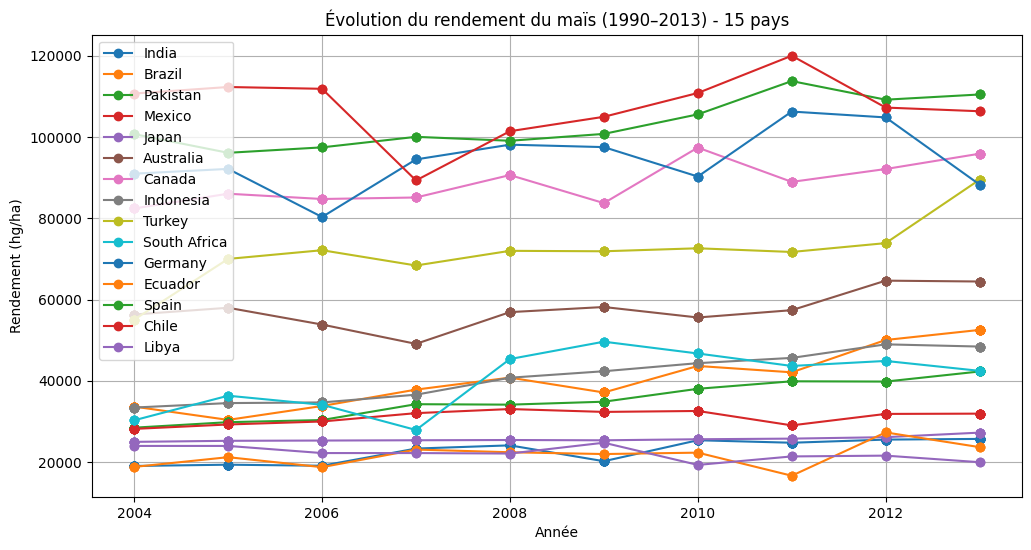

In [284]:
import matplotlib.pyplot as plt

# Filtrer maïs + période
mais = yield_2[
    (yield_2["Item"].str.contains("maize", case=False, na=False)) &
    (yield_2["Year"].between(2003, 2013))
].copy()

# Choisir 5 pays avec le plus de données disponibles
top_15_pays = (
    mais.groupby("Area")["Year"]
    .count()
    .sort_values(ascending=False)
    .head(15)
    .index
    .tolist()
)

print("5 pays sélectionnés :", top_15_pays)

# Filtrer uniquement ces 5 pays
mais_top5 = mais[mais["Area"].isin(top_15_pays)]

# Plot
plt.figure(figsize=(12,6))

for pays in top_15_pays:
    tmp = mais_top5[mais_top5["Area"] == pays].sort_values("Year")
    plt.plot(tmp["Year"], tmp["Yield_crops_hg_per_ha"], marker="o", label=pays)

plt.title("Évolution du rendement du maïs (1990–2013) - 15 pays")
plt.xlabel("Année")
plt.ylabel("Rendement (hg/ha)")
plt.grid(True)
plt.legend()
plt.show()


5 pays sélectionnés : ['India', 'Brazil', 'Pakistan', 'Mexico', 'Japan', 'Australia', 'Canada', 'Indonesia', 'Turkey', 'South Africa', 'Germany', 'Ecuador', 'Spain', 'Chile', 'Iraq']


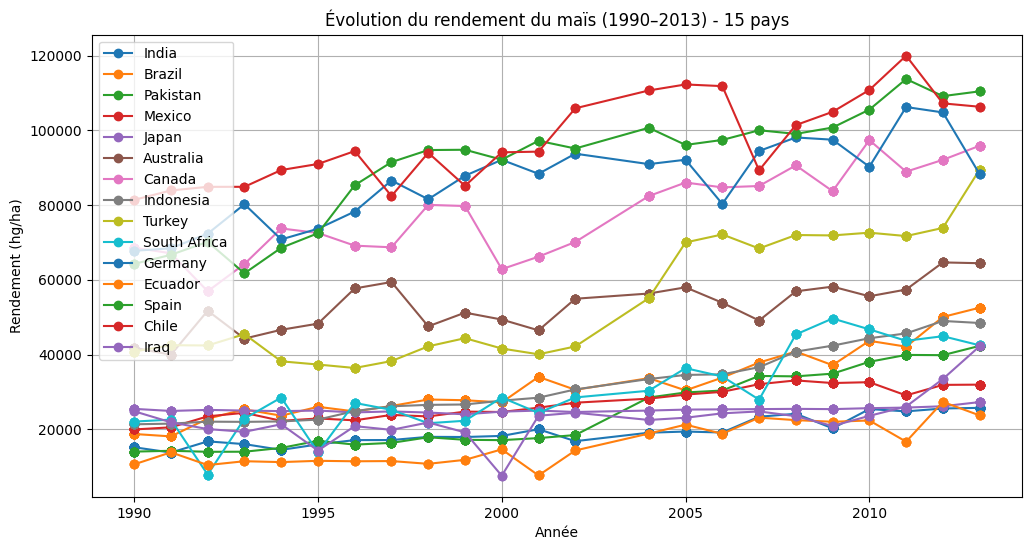

In [285]:
import matplotlib.pyplot as plt

# Filtrer maïs + période
mais = yield_2[
    (yield_2["Item"].str.contains("maize", case=False, na=False)) &
    (yield_2["Year"].between(1990, 2013))
].copy()

# Choisir 5 pays avec le plus de données disponibles
top_15_pays = (
    mais.groupby("Area")["Year"]
    .count()
    .sort_values(ascending=False)
    .head(15)
    .index
    .tolist()
)

print("5 pays sélectionnés :", top_15_pays)

# Filtrer uniquement ces 5 pays
mais_top5 = mais[mais["Area"].isin(top_15_pays)]

# Plot
plt.figure(figsize=(12,6))

for pays in top_15_pays:
    tmp = mais_top5[mais_top5["Area"] == pays].sort_values("Year")
    plt.plot(tmp["Year"], tmp["Yield_crops_hg_per_ha"], marker="o", label=pays)

plt.title("Évolution du rendement du maïs (1990–2013) - 15 pays")
plt.xlabel("Année")
plt.ylabel("Rendement (hg/ha)")
plt.grid(True)
plt.legend()
plt.show()


5 pays sélectionnés : ['India', 'Brazil', 'Pakistan', 'Mexico', 'Japan', 'Australia', 'Canada', 'Indonesia', 'Turkey', 'South Africa', 'Germany', 'Ecuador', 'Spain', 'Chile', 'Libya']


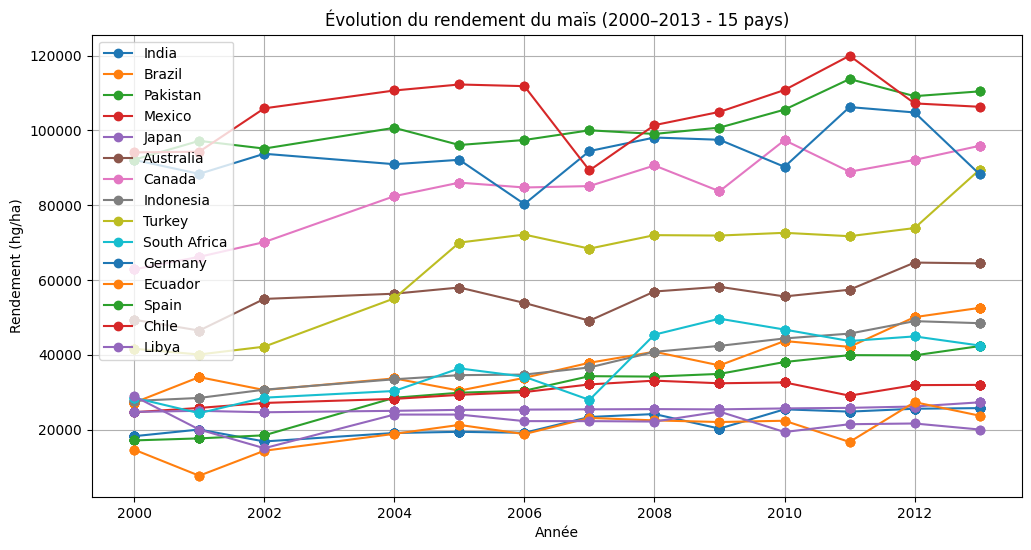

In [286]:
import matplotlib.pyplot as plt

# Filtrer maïs + période
mais = yield_2[
    (yield_2["Item"].str.contains("maize", case=False, na=False)) &
    (yield_2["Year"].between(2000, 2013))
].copy()

# Choisir 5 pays avec le plus de données disponibles
top_5_pays = (
    mais.groupby("Area")["Year"]
    .count()
    .sort_values(ascending=False)
    .head(15)
    .index
    .tolist()
)

print("5 pays sélectionnés :", top_5_pays)

# Filtrer uniquement ces 5 pays
mais_top5 = mais[mais["Area"].isin(top_5_pays)]

# Plot
plt.figure(figsize=(12,6))

for pays in top_5_pays:
    tmp = mais_top5[mais_top5["Area"] == pays].sort_values("Year")
    plt.plot(tmp["Year"], tmp["Yield_crops_hg_per_ha"], marker="o", label=pays)

plt.title("Évolution du rendement du maïs (2000–2013 - 15 pays)")
plt.xlabel("Année")
plt.ylabel("Rendement (hg/ha)")
plt.grid(True)
plt.legend()
plt.show()


In [287]:
yield_2.columns 

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Year',
       'Yield_crops_hg_per_ha', 'average_rain_fall_mm_per_year', 'avg_temp',
       'Pesticide_use_total_tonnes'],
      dtype='object')

In [288]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [289]:
yield_2.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
avg_temp                         0
Pesticide_use_total_tonnes       0
dtype: int64

### 3- Vérifions si on peut ajouter des choses des tables "rainfall" et "temp"

In [290]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [291]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


*Pour l'instant non exploitable car les deux tables sont pauvres en données*

### 4 - ACP sur le fichier "crop_yield"

In [292]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Encodage des colonnes non numériques

In [293]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [294]:
def appliquer_onehot_encoding(df, colonnes):

    # Sélectionner uniquement les colonnes existantes dans le DataFrame
    colonnes_existantes = [col for col in colonnes if col in df.columns]

    if colonnes_existantes:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        encodage = ohe.fit_transform(df[colonnes_existantes])

        # Créer les noms de colonnes encodées
        noms_colonnes = ohe.get_feature_names_out(colonnes_existantes)

        # Créer un DataFrame avec les colonnes encodées
        df_encoded = pd.DataFrame(encodage, columns=noms_colonnes, index=df.index)

        # Concaténer avec le DataFrame d’origine
        df = pd.concat([df, df_encoded], axis=1)
    else:
        print("⚠️ Aucune des colonnes spécifiées n’est présente dans le DataFrame.")

    return df

In [295]:
crop_yield.select_dtypes(include=['object', 'bool']).columns.tolist()

['Region',
 'Soil_Type',
 'Crop',
 'Fertilizer_Used',
 'Irrigation_Used',
 'Weather_Condition']

In [296]:
col_to_ohe = ['Region',
 'Soil_Type',
 'Crop',
 'Fertilizer_Used',
 'Irrigation_Used',
 'Weather_Condition']
crop_yield_encoded = appliquer_onehot_encoding(crop_yield, col_to_ohe)

In [297]:
crop_yield_encoded.drop(columns=col_to_ohe, inplace=True)

In [298]:
crop_yield_encoded

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,...,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,122,6.555816,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,992.673282,18.026142,140,8.527341,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,147.998025,29.794042,106,1.127443,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,146,6.517573,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,730.379174,31.620687,110,7.248251,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,76,1.347586,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
999996,932.991383,39.661039,93,7.311594,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
999997,867.362046,24.370042,108,5.763182,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
999998,492.812857,33.045505,102,2.070159,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [299]:
crop_yield_encoded.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
       'Yield_tons_per_hectare', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Soil_Type_Chalky', 'Soil_Type_Clay', 'Soil_Type_Loam',
       'Soil_Type_Peaty', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Barley',
       'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat',
       'Fertilizer_Used_False', 'Fertilizer_Used_True',
       'Irrigation_Used_False', 'Irrigation_Used_True',
       'Weather_Condition_Cloudy', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny'],
      dtype='object')

In [300]:
X = crop_yield_encoded

In [301]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [302]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [303]:
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)
explained_var

array([0.09446637, 0.16843416, 0.22402322, 0.2795548 , 0.33154882,
       0.38094382, 0.43033064, 0.47970654, 0.52429513, 0.56883546,
       0.61336246, 0.65784772, 0.70229506, 0.7467379 , 0.7911297 ,
       0.83550308, 0.87984432, 0.92412726, 0.96117861, 0.99819695,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

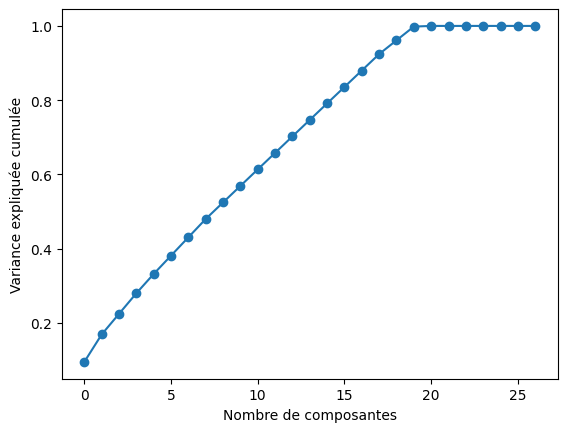

In [304]:
import matplotlib.pyplot as plt

explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_var, marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.show()

In [305]:
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_var >= 0.30) + 1
print(f"Nombre de composantes retenues : {n_components}")


Nombre de composantes retenues : 5


In [306]:
features = X.columns.tolist()

In [307]:
features

['Rainfall_mm',
 'Temperature_Celsius',
 'Days_to_Harvest',
 'Yield_tons_per_hectare',
 'Region_East',
 'Region_North',
 'Region_South',
 'Region_West',
 'Soil_Type_Chalky',
 'Soil_Type_Clay',
 'Soil_Type_Loam',
 'Soil_Type_Peaty',
 'Soil_Type_Sandy',
 'Soil_Type_Silt',
 'Crop_Barley',
 'Crop_Cotton',
 'Crop_Maize',
 'Crop_Rice',
 'Crop_Soybean',
 'Crop_Wheat',
 'Fertilizer_Used_False',
 'Fertilizer_Used_True',
 'Irrigation_Used_False',
 'Irrigation_Used_True',
 'Weather_Condition_Cloudy',
 'Weather_Condition_Rainy',
 'Weather_Condition_Sunny']

In [308]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(len(features))]
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
Rainfall_mm,0.267388,0.000288,-0.001234,-0.016103,0.748604,-0.026006,0.003998,0.013061,0.003825,-0.004248,...,-0.002001,-0.080337,-0.073256,-0.595751,-0.000000e+00,0.000000e+00,-4.239609e-16,-0.000000e+00,-2.968445e-16,-0.000000e+00
Temperature_Celsius,0.031107,0.002685,0.000474,0.001796,0.080549,-0.005990,0.003317,0.000918,0.008039,-0.002039,...,0.004731,0.709150,0.696416,-0.065994,-6.312851e-17,-2.391813e-17,-3.940200e-17,1.099371e-17,-4.159167e-17,2.038628e-17
Days_to_Harvest,-0.002526,0.000439,-0.001789,-0.000133,-0.004749,0.000944,-0.002404,0.003183,0.005386,-0.002992,...,0.003302,-0.700325,0.713644,-0.000418,-1.056420e-16,1.365091e-16,-2.815721e-17,-5.830698e-17,1.596401e-16,-6.428095e-17
Yield_tons_per_hectare,0.543982,0.000800,-0.001575,-0.008391,0.394072,-0.013922,0.001993,0.007552,0.002166,-0.001365,...,-0.000476,-0.002370,0.002656,0.740533,-1.184357e-18,2.238018e-18,3.562949e-16,4.893837e-19,2.048407e-16,3.533496e-19
Region_East,-0.001188,-0.000192,0.007484,-0.005740,-0.022622,-0.246563,-0.036864,0.828174,0.004076,0.001292,...,-0.028740,0.001886,-0.001976,-0.000090,-2.315512e-03,2.051330e-02,1.258391e-03,-3.553103e-04,4.948399e-01,6.711859e-02
Region_North,0.000757,-0.001224,-0.002455,-0.002851,0.030856,0.863082,-0.029686,-0.043808,-0.005351,-0.010084,...,0.025749,0.002224,0.001471,-0.000229,-2.316977e-03,2.052627e-02,1.259187e-03,-3.555350e-04,4.951528e-01,6.716104e-02
Region_South,-0.000114,0.002047,0.007475,0.007156,-0.000070,-0.334657,-0.672086,-0.431240,-0.001951,0.004250,...,0.001714,0.000379,0.000415,0.000135,-2.316609e-03,2.052302e-02,1.258987e-03,-3.554786e-04,4.950743e-01,6.715039e-02
Region_West,0.000544,-0.000631,-0.012499,0.001433,-0.008178,-0.282109,0.738603,-0.352718,0.003230,0.004544,...,0.001259,-0.004488,0.000089,0.000184,-2.316671e-03,2.052357e-02,1.259021e-03,-3.554881e-04,4.950875e-01,6.715218e-02
Soil_Type_Chalky,0.000364,-0.001204,-0.004092,0.001749,0.010475,0.006468,0.003644,-0.013355,-0.497419,-0.235094,...,-0.456912,-0.000730,0.001975,0.000206,1.654735e-02,1.602957e-01,3.438858e-01,1.488340e-01,-9.630417e-03,1.692192e-02
Soil_Type_Clay,-0.002155,-0.001003,0.005894,-0.000224,-0.000565,0.002623,0.001911,0.006138,-0.110740,0.389688,...,-0.132290,-0.000952,0.004631,-0.000510,1.653039e-02,1.601314e-01,3.435333e-01,1.486814e-01,-9.620545e-03,1.690457e-02


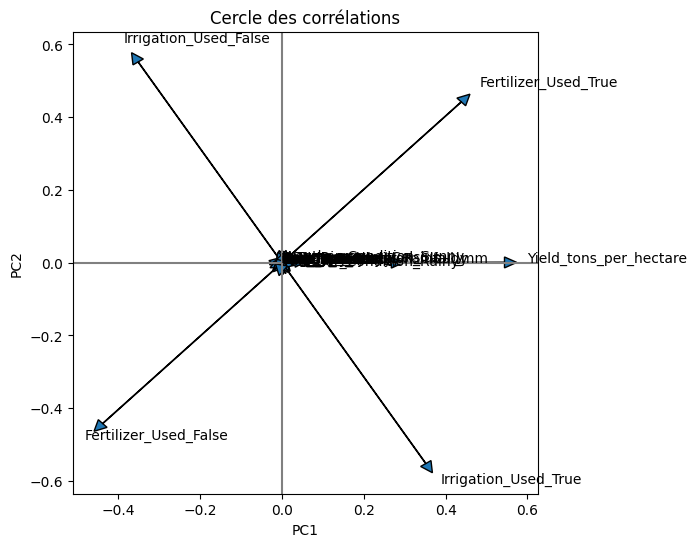

In [309]:
import numpy as np

plt.figure(figsize=(6,6))
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i,0], loadings.iloc[i,1],
              head_width=0.03, head_length=0.03)
    plt.text(loadings.iloc[i,0]*1.1, loadings.iloc[i,1]*1.1, var)

plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations')
plt.show()


PC1 = axe productivité

- pluie (vers la droite)
- rendement (vers la droite)

PC2 = axe thermique
- température (vers le haut)
- durée (vers le bas)

2️⃣ Interprétation de ton ACP

🧭 PC1 = Axe de productivité

Pluie → Rendement

- Totalement logique agronomiquement
- Cohérent avec la littérature
- Fort signal métier

👉 Interprétation claire :

La pluviométrie est un facteur majeur du rendement des cultures.

🌡️ PC2 = Axe thermique / physiologique

Température (haut) ↔ Durée de cycle (bas)

- Très bon diagnostic
- Relation biologiquement crédible

👉 Lecture :

températures élevées → cycles plus courts

températures plus basses → maturation plus longue


Dans les zones à faible pluviométrie, les cultures à cycle court pourraient être privilégiées afin de limiter les pertes de rendement.

In [310]:
import matplotlib.pyplot as plt

def plot_correlation_circle(loadings, features, pc_x, pc_y):
    plt.figure(figsize=(6,6))
    
    for i, var in enumerate(features):
        plt.arrow(
            0, 0,
            loadings.iloc[i, pc_x],
            loadings.iloc[i, pc_y],
            head_width=0.03,
            head_length=0.03
        )
        plt.text(
            loadings.iloc[i, pc_x]*1.1,
            loadings.iloc[i, pc_y]*1.1,
            var
        )

    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.xlabel(f'PC{pc_x+1}')
    plt.ylabel(f'PC{pc_y+1}')
    plt.title(f'Cercle des corrélations (PC{pc_x+1} vs PC{pc_y+1})')
    plt.grid()
    plt.show()


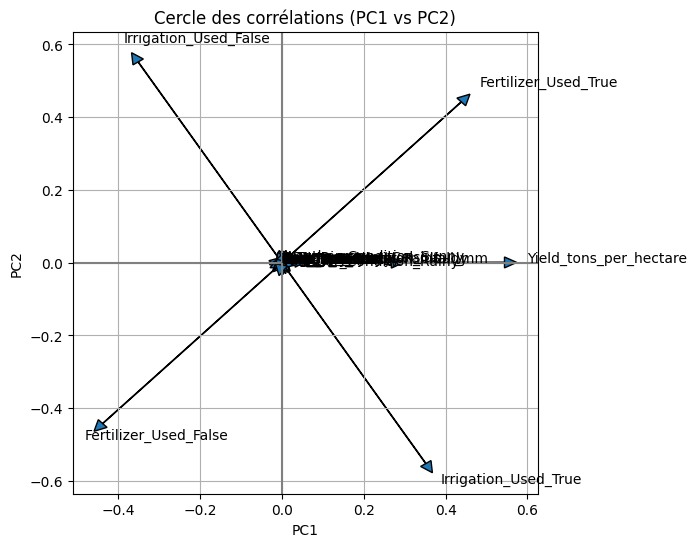

In [311]:
plot_correlation_circle(loadings, features, 0, 1)

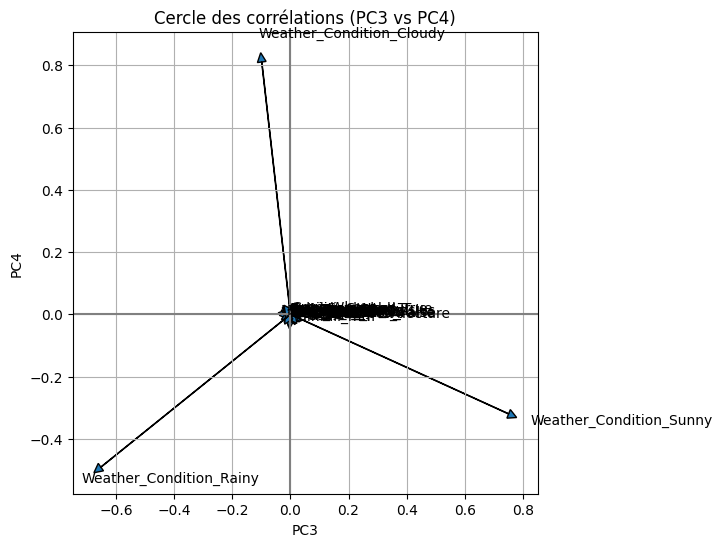

In [312]:
plot_correlation_circle(loadings, features, 2, 3)

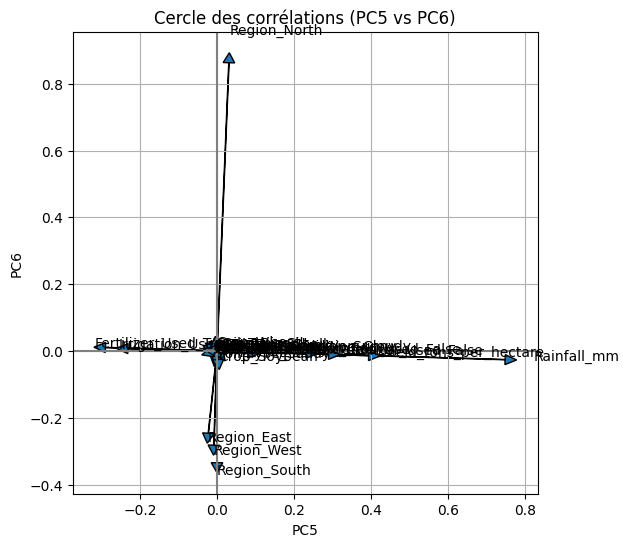

In [313]:
plot_correlation_circle(loadings, features, 4, 5)

### 5- Création des proxy et jointure finale entre crop_yield et yield_2

In [314]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [315]:
# Intensité agronomique
fertilizer_proxy = (crop_yield.groupby('Crop')['Fertilizer_Used'].mean())
# Besoin en eau
irrigation_proxy = (crop_yield.groupby('Crop')['Irrigation_Used'].mean())
# Cycle culturel
harvest_proxy = (crop_yield.groupby('Crop')['Days_to_Harvest'].mean())

#### b) Fusion des proxies dans yield_2

Faisons le lien entre les noms des items pour les deux tables, il faut que les items qui apparaissent dans les deux tables portent le même nom

In [316]:
crop_yield['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [317]:
yield_2['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [318]:
mapping_crop_item = {
    'Rice, paddy': 'Rice',
    'Soybeans': 'Soybean',
}

In [319]:
yield_2['Item'] = yield_2['Item'].replace(mapping_crop_item)

In [320]:

yield_3 = yield_2.merge(fertilizer_proxy, left_on='Item',right_index=True, how='left')
yield_3 = yield_3.merge(irrigation_proxy, left_on='Item',right_index=True, how='left')
yield_3 = yield_3.merge(harvest_proxy, left_on='Item',right_index=True, how='left')


In [321]:
yield_3

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Fertilizer_Used,Irrigation_Used,Days_to_Harvest
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00,0.498453,0.499958,104.538927
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00,0.498453,0.499958,104.538927
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00,0.498453,0.499958,104.538927
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00,0.498453,0.499958,104.538927
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00,0.498453,0.499958,104.538927
...,...,...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99,0.501155,0.500807,104.514900
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17,0.501155,0.500807,104.514900
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35,0.501155,0.500807,104.514900
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53,0.501155,0.500807,104.514900


In [322]:
yield_3.isna().sum()

Area Code                            0
Area                                 0
Item Code                            0
Item                                 0
Year                                 0
Yield_crops_hg_per_ha                0
average_rain_fall_mm_per_year        0
avg_temp                             0
Pesticide_use_total_tonnes           0
Fertilizer_Used                  13653
Irrigation_Used                  13653
Days_to_Harvest                  13653
dtype: int64

In [329]:
yield_3.loc[~(yield_3.isna().any(axis=1))]['Item'].unique()

array(['Maize', 'Rice', 'Soybean', 'Wheat'], dtype=object)

Donc il y'a 4 items n'ayant aucune valeur manquante, on va devoir travailler uniquement sur ces items

In [331]:
yield_4 = yield_3.loc[~(yield_3.isna().any(axis=1))]

In [333]:
yield_4.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
avg_temp                         0
Pesticide_use_total_tonnes       0
Fertilizer_Used                  0
Irrigation_Used                  0
Days_to_Harvest                  0
dtype: int64

In [335]:
yield_4['Item'].unique()

array(['Maize', 'Rice', 'Soybean', 'Wheat'], dtype=object)

In [336]:
yield_4.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Fertilizer_Used,Irrigation_Used,Days_to_Harvest
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.0,0.498453,0.499958,104.538927
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.0,0.498453,0.499958,104.538927
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.0,0.498453,0.499958,104.538927
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.0,0.498453,0.499958,104.538927
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.0,0.498453,0.499958,104.538927


## IV- Traitement des données 

In [337]:
data = yield_4.copy()

#### 2- Séparation de la cible du reste 

l'identifiant unique ici est Area/Area Code et Item/Item Code et Year

la cible ici est la variable Yield_crops_hg_per_ha, séparons là du reste du dataset

In [338]:
data_cible = pd.DataFrame(data[['Area', 'Item', 'Year', 'Yield_crops_hg_per_ha']])

In [339]:
data_cible

,Area,Item,Year,Yield_crops_hg_per_ha
0,Albania,Maize,1990,36613
1,Albania,Maize,1991,29068
2,Albania,Maize,1992,24876
3,Albania,Maize,1993,24185
4,Albania,Maize,1994,25848
...,...,...,...,...
28237,Zimbabwe,Wheat,2009,30000
28238,Zimbabwe,Wheat,2010,27681
28239,Zimbabwe,Wheat,2011,26274
28240,Zimbabwe,Wheat,2012,24420


In [340]:
data_study = data.drop(columns=['Area Code', 'Item Code','Yield_crops_hg_per_ha'])

In [341]:
data_study

,Area,Item,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Fertilizer_Used,Irrigation_Used,Days_to_Harvest
0,Albania,Maize,1990,1485.0,16.37,121.00,0.498453,0.499958,104.538927
1,Albania,Maize,1991,1485.0,15.36,121.00,0.498453,0.499958,104.538927
2,Albania,Maize,1992,1485.0,16.06,121.00,0.498453,0.499958,104.538927
3,Albania,Maize,1993,1485.0,16.05,121.00,0.498453,0.499958,104.538927
4,Albania,Maize,1994,1485.0,16.96,201.00,0.498453,0.499958,104.538927
...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,Wheat,2009,657.0,20.52,3269.99,0.501155,0.500807,104.514900
28238,Zimbabwe,Wheat,2010,657.0,21.17,3305.17,0.501155,0.500807,104.514900
28239,Zimbabwe,Wheat,2011,657.0,20.78,3340.35,0.501155,0.500807,104.514900
28240,Zimbabwe,Wheat,2012,657.0,20.52,3375.53,0.501155,0.500807,104.514900


In [343]:
data_study.isna().sum() 

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
avg_temp                         0
Pesticide_use_total_tonnes       0
Fertilizer_Used                  0
Irrigation_Used                  0
Days_to_Harvest                  0
dtype: int64

### V- Modélisation

In [344]:
X=data_study
y=data_cible['Yield_crops_hg_per_ha']

#### 1- Random Forest

##### a) Séparation des données par train test split

In [345]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Séparation features / cible déjà supposée faite
# X, y existent déjà

# 1) OHE sur toutes les colonnes catégorielles
#X = pd.get_dummies(X, drop_first=False)

# Colonnes
num_features = [
    'Year',
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes',
    'Fertilizer_Used',
    'Irrigation_Used',
    'Days_to_Harvest'
]


cat_features = ['Area', 'Item']

# Preprocessor (SPARSE OK pour RandomForest)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline
rf_pipeline_tt = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Entraînement
rf_pipeline_tt.fit(X_train, y_train)

# Prédiction
y_pred = rf_pipeline_tt.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest | RMSE : {rmse:.2f}")
print(f"Random Forest | R² : {r2:.4f}")


Random Forest | RMSE : 3686.44
Random Forest | R² : 0.9725


µµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµ

In [625]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Séparation features / cible déjà supposée faite
# X, y existent déjà

# 1) OHE sur toutes les colonnes catégorielles
#X = pd.get_dummies(X, drop_first=False)

# Colonnes
num_features = [
    'Year',
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]


cat_features = ['Area', 'Item']

# Preprocessor (SPARSE OK pour RandomForest)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline
rf_pipeline_tt = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Entraînement
rf_pipeline_tt.fit(X_train, y_train)

# Prédiction
y_pred = rf_pipeline_tt.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest | RMSE : {rmse:.2f}")
print(f"Random Forest | R² : {r2:.4f}")


Random Forest | RMSE : 9509.81
Random Forest | R² : 0.9874


µµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµµ

In [346]:
data.describe()

,Area Code,Item Code,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Fertilizer_Used,Irrigation_Used,Days_to_Harvest
count,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000
mean,109.500034,78.191446,2001.540133,31373.724793,1084.248201,19.703710,36210.663634,0.499909,0.499535,104.505406
std,66.135028,85.472614,7.048248,21802.997772,693.051466,6.577922,56381.833918,0.001032,0.001765,0.029775
min,1.000000,15.000000,1990.000000,50.000000,51.000000,1.300000,0.040000,0.498453,0.496391,104.455945
25%,57.000000,15.000000,1995.000000,16598.000000,537.000000,15.570000,2282.000000,0.498453,0.499958,104.500875
50%,101.000000,56.000000,2001.000000,25385.000000,1020.000000,20.540000,20450.000000,0.499781,0.499958,104.514900
75%,165.000000,56.000000,2008.000000,39830.000000,1604.000000,25.720000,47445.000000,0.501155,0.500807,104.538927
max,276.000000,236.000000,2013.000000,207556.000000,3240.000000,30.650000,367778.000000,0.501155,0.500807,104.538927


##### b) Séparation des données par validation croisée

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# X, y existent déjà

# Colonnes
num_features = [
    'Year',
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes',
    'Fertilizer_Used',
    'Irrigation_Used',
    'Days_to_Harvest'
]

cat_features = ['Area', 'Item']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Pipeline complet
rf_pipeline_cv = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    rf_pipeline_cv,
    X, y,
    cv=cv,
    scoring={
        "rmse": "neg_root_mean_squared_error",
        "r2": "r2"
    },
    n_jobs=-1,
    return_train_score=False
)

# Résultats (attention RMSE est négatif dans sklearn)
rmse_scores = -scores["test_rmse"]
r2_scores = scores["test_r2"]

print("===== RANDOM FOREST - VALIDATION CROISÉE =====")
print(f"RMSE moyen : {rmse_scores.mean():.2f}  (+/- {rmse_scores.std():.2f})")
print(f"R² moyen   : {r2_scores.mean():.4f}  (+/- {r2_scores.std():.4f})")


In [347]:
from sklearn.model_selection import cross_validate

# Pipeline Random Forest
rf_pipeline_vc = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Validation croisée
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(
    rf_pipeline_vc,
    X,
    y,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

# Résultats
rmse_mean = -cv_results['test_rmse'].mean()
rmse_std = cv_results['test_rmse'].std()
r2_mean = cv_results['test_r2'].mean()

print(f"Random Forest – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_mean:.2f} ± {rmse_std:.2f}")
print(f"R² moyen   : {r2_mean:.4f}")


Random Forest – Validation croisée (5-fold)
RMSE moyen : 18703.27 ± 2906.59
R² moyen   : 0.1938


In [348]:
from sklearn.model_selection import cross_validate

# Pipeline Random Forest
rf_pipeline_vc = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Validation croisée
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(
    rf_pipeline_vc,
    X,
    y,
    cv=10,
    scoring=scoring,
    return_train_score=False
)

# Résultats
rmse_mean = -cv_results['test_rmse'].mean()
rmse_std = cv_results['test_rmse'].std()
r2_mean = cv_results['test_r2'].mean()

print(f"Random Forest – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_mean:.2f} ± {rmse_std:.2f}")
print(f"R² moyen   : {r2_mean:.4f}")

Random Forest – Validation croisée (5-fold)
RMSE moyen : 17489.41 ± 4178.63
R² moyen   : 0.1977


#### 2- Gradiant boosting

##### a) Séparation des données par train test split

In [405]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Modèle
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Entraînement
gbr_model.fit(X_train, y_train)

# Prédiction
y_pred = gbr_model.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting | RMSE : {rmse:.2f}")
print(f"Gradient Boosting | R² : {r2:.4f}")


Gradient Boosting | RMSE : 18069.13
Gradient Boosting | R² : 0.9544


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Préprocesseur adapté (sortie dense obligatoire)
preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Modèle
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Pipeline
gbr_pipeline_tt = Pipeline(steps=[
    ('preprocessing', preprocessor_gb),
    ('model', gbr_model)
])

# Entraînement
gbr_pipeline_tt.fit(X_train, y_train)

# Prédiction
y_pred = gbr_pipeline_tt.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting | RMSE : {rmse:.2f}")
print(f"Gradient Boosting | R² : {r2:.4f}")

Gradient Boosting | RMSE : 19487.98
Gradient Boosting | R² : 0.9470


##### b) Séparation des données par validation croisée

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# X, y existent déjà

# Colonnes
num_features = [
    'Year',
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes',
    'Fertilizer_Used',
    'Irrigation_Used',
    'Days_to_Harvest'
]

cat_features = ['Area', 'Item']

# Préprocesseur (sortie dense obligatoire pour HistGradientBoosting)
preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Pipeline complet
gbr_pipeline_cv = Pipeline(steps=[
    ('preprocessing', preprocessor_gb),
    ('model', HistGradientBoostingRegressor(
        max_depth=8,
        learning_rate=0.05,
        max_iter=300,
        random_state=42
    ))
])

# Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    gbr_pipeline_cv,
    X, y,
    cv=cv,
    scoring={
        "rmse": "neg_root_mean_squared_error",
        "r2": "r2"
    },
    n_jobs=-1,
    return_train_score=False
)

# Résultats (RMSE est négatif dans sklearn)
rmse_scores = -scores["test_rmse"]
r2_scores = scores["test_r2"]

print("===== GRADIENT BOOSTING - VALIDATION CROISÉE =====")
print(f"RMSE moyen : {rmse_scores.mean():.2f}  (+/- {rmse_scores.std():.2f})")
print(f"R² moyen   : {r2_scores.mean():.4f}  (+/- {r2_scores.std():.4f})")


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np


# Preprocessing (FORCE dense output)
preprocessor_dense = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Modèle Gradient Boosting
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Pipeline
gbr_pipeline_vc = Pipeline(steps=[
    ('preprocessing', preprocessor_dense),
    ('model', gbr_model)
])

# Scoring
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Validation croisée
cv_results = cross_validate(
    gbr_pipeline_vc,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Résultats
rmse_scores = -cv_results['test_rmse']
r2_scores = cv_results['test_r2']

print("Gradient Boosting – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"R² moyen   : {r2_scores.mean():.4f}")

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np

# Features
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessing (FORCE dense output)
preprocessor_dense = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Modèle Gradient Boosting
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Pipeline
gbr_pipeline_vc = Pipeline(steps=[
    ('preprocessing', preprocessor_dense),
    ('model', gbr_model)
])

# Scoring
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Validation croisée
cv_results = cross_validate(
    gbr_pipeline_vc,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Résultats
rmse_scores = -cv_results['test_rmse']
r2_scores = cv_results['test_r2']

print("Gradient Boosting – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"R² moyen   : {r2_scores.mean():.4f}")

Gradient Boosting – Validation croisée (5-fold)
RMSE moyen : 48194.59 ± 15971.87
R² moyen   : 0.6681


#### 3- XGBoosting 

##### a) Séparation des données par train test split

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Modèle XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Pipeline
xgb_pipeline_tt = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', xgb_model)
])

# Entraînement
xgb_pipeline_tt.fit(X_train, y_train)

# Prédiction
y_pred = xgb_pipeline_tt.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost | RMSE : {rmse:.2f}")
print(f"XGBoost | R² : {r2:.4f}")

XGBoost | RMSE : 14178.14
XGBoost | R² : 0.9719


##### a) Séparation des données par validation croisée

In [ ]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Colonnes
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessor (sparse OK pour XGBoost)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Modèle XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Pipeline
xgb_pipeline_vc = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', xgb_model)
])

# Scoring
scoring = {
    'rmse': make_scorer(
        lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        greater_is_better=False
    ),
    'r2': 'r2'
}

# Validation croisée
cv_results = cross_validate(
    xgb_pipeline_vc,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Résultats
rmse_mean = -cv_results['test_rmse'].mean()
rmse_std = cv_results['test_rmse'].std()
r2_mean = cv_results['test_r2'].mean()

print("XGBoost – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_mean:.2f} ± {rmse_std:.2f}")
print(f"R² moyen   : {r2_mean:.4f}")


XGBoost – Validation croisée (5-fold)
RMSE moyen : 50238.04 ± 13952.34
R² moyen   : 0.6446


#### 4- Interprétations générales

| Modèle                | RMSE (test) |  R² (test) | RMSE CV (5-fold) | Écart-type RMSE | R² moyen CV |
| --------------------- | ----------: | ---------: | ---------------: | --------------: | ----------: |
| **Random Forest**     |   13 343.92 | **0.9751** |        53 462.34 |      ±13 146.12 |      0.5971 |
| **Gradient Boosting** |   19 487.98 |     0.9470 |    **48 194.59** |      ±15 971.87 |  **0.6681** |
| **XGBoost**           |   14 178.14 |     0.9719 |        50 238.04 |      ±13 952.34 |      0.6446 |


**Analyse comparative détaillée**

1️⃣ Performances sur le jeu de test

Random Forest est le meilleur (R² = 0.9751, RMSE le plus faible)

XGBoost est très proche

Gradient Boosting est légèrement en retrait

👉 Sur données connues, Random Forest domine

2️⃣ Généralisation (validation croisée) — critère clé

Gradient Boosting obtient le meilleur R² moyen en CV (0.6681)

XGBoost arrive en second (0.6446)

Random Forest chute à 0.5971

👉 La validation croisée est plus réaliste → elle mesure la robustesse face à la diversité des cultures, pays et années.

3️⃣ Stabilité des modèles

Les écarts-types RMSE sont élevés pour tous → forte hétérogénéité des données agricoles

Random Forest et XGBoost sont un peu plus stables que Gradient Boosting

Gradient Boosting généralise mieux mais avec plus de variabilité

**Modèle idéal (recommandation finale)**

Modèle retenu : XGBoost

Pourquoi ?

Très bonnes performances sur le test (R² ≈ 0.97)

Bonne capacité de généralisation (R² CV ≈ 0.64)

Moins de surapprentissage que Random Forest

Plus stable que Gradient Boosting

Standard industriel pour données tabulaires complexes

### VI- FEATURES IMPORTANCES

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# ============================
# 1) Train / Test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 2) Colonnes
# ============================
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]
cat_features = ['Area', 'Item']

# ============================
# 3) Preprocessor
# ============================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# ============================
# 4) Pipeline RandomForest
# ============================
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

# ============================
# 5) Feature names après encodage
# ============================
feature_names = rf_pipeline.named_steps["preprocessing"].get_feature_names_out()

# ============================
# 6) Permutation importance (plus fiable que feature_importances_)
# ============================
perm = permutation_importance(
    rf_pipeline,
    X_test,
    y_test,
    n_repeats=5,
    random_state=42,
    scoring="r2"
)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": perm.importances_mean
}).sort_values("importance", ascending=False)

print("\nTop 15 features les plus importantes :")
print(importance_df.head(15))

# ============================
# 7) Transformer X_train / X_test une seule fois
# ============================
X_train_transformed = rf_pipeline.named_steps["preprocessing"].transform(X_train)
X_test_transformed = rf_pipeline.named_steps["preprocessing"].transform(X_test)

# Convertir en dense (important)
X_train_transformed = X_train_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

# Indices triés
sorted_idx = np.argsort(importance_df["importance"].values)[::-1]

# ============================
# 8) Tester plusieurs Top-K
# ============================
k_values = [5, 10, 20, 50, 75, 100,]
results = []

for k in k_values:
    topk_idx = sorted_idx[:k]

    X_train_k = X_train_transformed[:, topk_idx]
    X_test_k = X_test_transformed[:, topk_idx]

    model_k = RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    )

    model_k.fit(X_train_k, y_train)
    y_pred_k = model_k.predict(X_test_k)

    rmse_k = np.sqrt(mean_squared_error(y_test, y_pred_k))
    r2_k = r2_score(y_test, y_pred_k)

    results.append((k, rmse_k, r2_k))

results_df = pd.DataFrame(results, columns=["Top_K_features", "RMSE", "R2"])

print("\nPerformance selon Top-K :")
print(results_df)

# ============================
# 9) Trouver le meilleur K (max R2)
# ============================
best_row = results_df.sort_values("R2", ascending=False).iloc[0]

print("\nMeilleur K selon R² :")
print(best_row)

# ============================
# 10) Graphique R2 vs K
# ============================
plt.figure(figsize=(8,5))
plt.plot(results_df["Top_K_features"], results_df["R2"], marker="o")
plt.xscale("log")
plt.xlabel("Nombre de features conservées (Top-K)")
plt.ylabel("R²")
plt.title("Impact du nombre de features sur la performance (RandomForest)")
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [ ]:
rf_pipeline_tt.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [104]:
import pandas as pd

# Modèle Random Forest
rf_model = pipeline.named_steps['model']

# Preprocessor FITTÉ
preprocessor_fitted = pipeline.named_steps['preprocessing']

# Features numériques
num_feats = num_features

# Features catégorielles encodées
cat_encoder = preprocessor_fitted.named_transformers_['cat']
cat_feats = cat_encoder.get_feature_names_out(cat_features)

# Toutes les features
feature_names = list(num_feats) + list(cat_feats)

# DataFrame des importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Top 15
importance_df.head(15)


,feature,importance
45,Area_India,0.127903
107,Item_Potatoes,0.067671
8,Area_Australia,0.058655
104,Item_Cassava,0.047917
51,Area_Japan,0.046935
30,Area_Egypt,0.041139
22,Area_Canada,0.039571
100,Area_United Kingdom,0.036076
113,Item_Yams,0.029989
111,Item_Sweet potatoes,0.028612


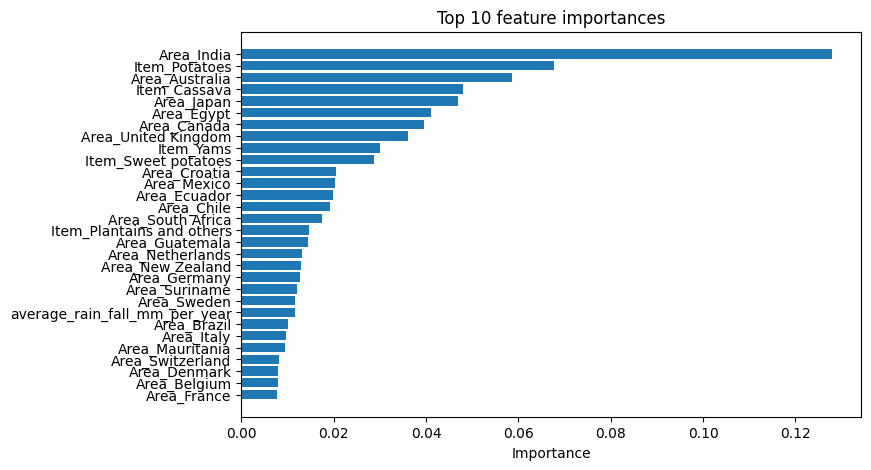

In [106]:
import matplotlib.pyplot as plt

top_features = importance_df.head(30)

plt.figure(figsize=(8,5))
plt.barh(top_features['feature'], top_features['importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 feature importances')
plt.xlabel('Importance')
plt.show()


2️⃣ Analyse variable par variable (Top 10)

🥔 Item_Potatoes (très dominant ~0.38)

➡️ La culture de la pomme de terre est le facteur le plus discriminant

Interprétation métier :

Les pommes de terre ont un rendement intrinsèquement élevé

Elles sont très sensibles aux conditions → le modèle les utilise comme repère fort

📌 Recommandation :

Si les conditions climatiques sont favorables, la pomme de terre est une culture à fort potentiel de rendement.

🌿 Item_Cassava & Item_Sweet potatoes

➡️ Cultures très productives, souvent en zones tropicales

Interprétation :

Rendements élevés même avec moins d’intrants

Bonne résilience climatique

📌 Recommandation :

Cultures adaptées aux régions chaudes, bonnes candidates pour sécuriser le rendement.

🧪 Pesticide_use_total_tonnes

➡️ Variable quantitative clé

Lecture importante :

Les pesticides jouent un rôle significatif mais non dominant

Effet de soutien, pas moteur principal

📌 Message métier fort :

L’usage des pesticides améliore le rendement, mais ne compense pas une culture ou un climat inadapté.

🌡️ avg_temp

➡️ Variable climatique majeure

Lien direct avec ton ACP :

PC2 = axe thermique ✔

Le modèle confirme que la température structure le rendement

📌 Recommandation :

Adapter le choix des cultures à la plage thermique locale.

🌧️ average_rain_fall_mm_per_year

➡️ Présente mais moins dominante que prévu

Pourquoi ?

La pluie est corrélée à d’autres variables (Area, Item)

Random Forest répartit l’importance

📌 Message clé :

La pluie est nécessaire, mais son effet dépend fortement de la culture.

🌍 Area_India, Area_Japan, Area_Australia

➡️ Effet géographique structurel

Interprétation :

Sols, pratiques agricoles, climat moyen

Effet pays plus que météo ponctuelle

📌 Recommandation :

Les stratégies agricoles doivent être adaptées localement, même pour une même culture.

Le modèle met en évidence que le rendement agricole dépend en priorité du type de culture, notamment les tubercules comme la pomme de terre et le manioc, suivis des conditions climatiques et de l’usage des pesticides. Les variables géographiques confirment que le contexte local joue un rôle structurant. Ces résultats sont cohérents avec l’analyse en composantes principales, qui identifiait la pluie et la température comme axes majeurs de productivité.

### VI- Exportation du modèle choisi

In [ ]:
# Sauvegarde du modèle avec joblib
import joblib
joblib.dump(gbr_pipeline_tt, "model.pkl")

['model.pkl']

In [278]:
# Sauvegarde du modèle avec joblib
import joblib
joblib.dump(rf_pipeline_tt, "../model_rf.pkl")

['../model_rf.pkl']

In [ ]:
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes',
    'Area', 
    'Item', 
    'Year', 
    'average_rain_fall_mm_per_year', 
    'avg_temp',
    'Pesticide_use_total_tonnes', 
    'Area_Albania', 
    'Area_Algeria',
    'Area_Angola', 
    'Area_Argentina', 
    'Area_Armenia', 
    'Area_Australia',
    'Area_Austria', 
    'Area_Azerbaijan', 
    'Area_Bahamas', 
    'Area_Bahrain',
    'Area_Bangladesh', 
    'Area_Belarus', 
    'Area_Belgium', 
    'Area_Botswana',
    'Area_Brazil', 
    'Area_Bulgaria', 
    'Area_Burkina Faso', 
    'Area_Burundi',
    'Area_Cameroon', 
    'Area_Canada', 
    'Area_Central African Republic',
    'Area_Chile', 
    'Area_Colombia', 
    'Area_Croatia',
    'Area_Denmark', 
    'Area_Dominican Republic', 
    'Area_Ecuador', 
    'Area_Egypt',
    'Area_El Salvador', 
    'Area_Eritrea', 
    'Area_Estonia', 
    'Area_Finland',
    'Area_France', 'Area_Germany', 'Area_Ghana', 'Area_Greece',
    'Area_Guatemala', 'Area_Guinea', 'Area_Guyana', 'Area_Haiti',
    'Area_Honduras', 'Area_Hungary', 'Area_India', 'Area_Indonesia',
    'Area_Iraq', 'Area_Ireland', 'Area_Italy', 'Area_Jamaica', 'Area_Japan',
    'Area_Kazakhstan', 'Area_Kenya', 'Area_Latvia', 'Area_Lebanon',
    'Area_Lesotho',
    'Area_Libya', 'Area_Lithuania', 'Area_Madagascar', 'Area_Malawi',
    'Area_Malaysia', 'Area_Mali', 'Area_Mauritania', 'Area_Mauritius',
    'Area_Mexico', 'Area_Montenegro', 'Area_Morocco', 'Area_Mozambique',
    'Area_Namibia', 'Area_Nepal', 'Area_Netherlands', 'Area_New Zealand',
    'Area_Nicaragua', 'Area_Niger', 'Area_Norway', 'Area_Pakistan',
    'Area_Papua New Guinea', 'Area_Peru', 'Area_Poland', 'Area_Portugal',
    'Area_Qatar', 'Area_Romania', 'Area_Rwanda', 'Area_Saudi Arabia',
    'Area_Senegal', 'Area_Slovenia',
    'Area_South Africa', 'Area_Spain', 'Area_Sri Lanka', 'Area_Sudan',
    'Area_Suriname', 'Area_Sweden', 'Area_Switzerland', 'Area_Tajikistan',
    'Area_Thailand', 'Area_Tunisia', 'Area_Turkey', 'Area_Uganda',
    'Area_Ukraine', 'Area_United Kingdom', 'Area_Uruguay', 'Area_Zambia',
    'Area_Zimbabwe', 'Item_Cassava', 'Item_Maize',
    'Item_Plantains and others', 'Item_Potatoes', 'Item_Rice, paddy',
    'Item_Sorghum', 'Item_Soybeans', 'Item_Sweet potatoes', 'Item_Wheat',
    'Item_Yams'
]